<a href="https://colab.research.google.com/github/kwaldenphd/poemBot/blob/master/test_interfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup (aka run this first)

In [1]:
import sys, pandas as pd, numpy as np, json, random, re, gzip, textwrap, csv, requests # import all the things
from datetime import date, datetime

from IPython.display import display, HTML # for centering in a Jupyter Notebook

In [3]:
subset = pd.read_csv("https://raw.githubusercontent.com/kwaldenphd/interactive-visualization-python/main/data/filtered_subset.csv") # load data as df

"""
# load data using csv
with open('filtered_subset.csv', encoding='utf-8') as csvPoems:
  allPoems = list(csv.reader(csvPoems, delimiter=','))
"""

"\n# load data using csv\nwith open('filtered_subset.csv', encoding='utf-8') as csvPoems:\n  allPoems = list(csv.reader(csvPoems, delimiter=','))\n"

# Output Random Poem

Randomly selects a poem.

## Pandas DataFrame Workflow

In [119]:
def randPoem(df): #  function to output random poem
  randPoem = df.sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
    wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
    wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

html_src = "<div style='text-align:left'>" # center in ipynb
html_src += str(randPoem(subset))
html_src += "<div>"
display(HTML(html_src))

Sonnet 30 (Fire And Ice) 
 
 My love is like to ice, and I to
    fire:
 how comes it then that this her
    cold so great
 is not dissolv'd through my so
    hot desire,
 but harder grows, the more I
    her entreat?

 Or how comes it that my
    exceeding heat
 is not delayed by her heart
    frozen cold,
 but that I burn much more in
    boiling sweat,
 and feel my flames augmented
    manifold?

 What more miraculous thing may
    be told
 that fire, which all thing
    melts, should harden ice:
 and ice which is congealed with
    senseless cold,
 should kindle fire by wonderful
    device?

 Such is the pow'r of love in
    gentle mind
 that it can alter all the
    course of kind.
 
 
 Edmund Spenser 
 PoemDB


## CSV Workflow

In [ ]:
def printPoem(allPoems): # function def
  randPoem = random.choice(allPoems)
  wrappedTitle = textwrap.fill(randPoem[0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[2], width=32)
  wrappedSource = textwrap.fill(randPoem[3], width=32)
  wrappedPoem = ""
  for line in randPoem[1].splitlines():
      wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
      wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

printPoem(allPoems) # function call

# Output Random Poem Based on Keyword Input

Asks the user for a keyword input and randomly selects a poem that contains that term.

In [9]:
def keyPoem(poems): # function to have user input keyword & output random poem
  keyword = input("Enter a search term: ")
  randPoem = poems[poems['text'].str.contains(keyword)].sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
      wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
      wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

keyPoem(subset) # function call

Enter a search term: strip
Ceremony 
 
 
A striped blouse in a clearing
    by Bazille
Is, you may say, a patroness of
    boughs
Too queenly kind toward nature
    to be kin.
But ceremony never did conceal,
Save to the silly eye, which all
    allows,
How much we are the woods we
    wander in.
Let her be some Sabrina fresh
    from stream,
Lucent as shallows slowed by
    wading sun,
Bedded on fern, the flowers’
    cynosure:
Then nymph and wood must nod and
    strive to dream
That she is airy earth, the
    trees, undone,
Must ape her languor natural and
    pure.
Ho-hum. I am for wit and
    wakefulness,
And love this feigning lady by
    Bazille.
What's lightly hid is deepest
    understood,
And when with social smile and
    formal dress
She teaches leaves to curtsey
    and quadrille,
I think there are most tigers in
    the wood.
 
 
 Richard Wilbur 
 Poetry Foundation


# Output Poem Based on Day of Week

Gets the day of the week (as a string) and randomly selects a poem that contains that keyword.

In [ ]:
date = datetime.now() # get date
day = date.strftime('%A')

def dayPoem(poems): # function to output random poem that includes day of week
  date = datetime.now()
  day = date.strftime('%A')
  randPoem = poems[poems['text'].str.contains(day)].sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
      wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
      wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

dayPoem(subset) # function call

Get Used To It 
 
 
Wake up, even Monday the cup's
    still full,
lettuce rosette-ing up between
    sandstone scraps
by back steps where ladybugs
    swarm in
to die or lay eggs, some say,
    death-march
or birth-march looking about the
    same.


The rust of barn-sides:
    different chemical effect
than rust of oak-copse, burning
    with late fervor
beyond reaped cornfields.
 
 
 Margaret Young 
 Poets.Org


# Output Poem Based on Weather

Uses a weather API to get a description of the current weather for `46556` zip code, converts to list of strings. Uses `nltk` to get synonyms for the weather descriptive terms. Selects a random term from the synonym list and randomly selects a poem that contains that keyword.

In [14]:
! pip install nltk # all the nltk shit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import nltk # more nltk shit
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Get Weather

- [OpenWeatherMap API](https://openweathermap.org/api)
- [GeeksForGeeks tutorial](https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/)

In [12]:
api_key = "50574b5b7d941583dd781ca893a6a194" # api key

def getWeather(api_key): # function definition
  url = "https://api.openweathermap.org/data/2.5/weather?lat=41.7002&lon=-86.2379&appid=" + api_key
  response = requests.get(url)
  x = response.json()
  weather = x['weather'][0]['main']
  weather += " "
  weather += x['weather'][0]['description']
  weather = weather.split()
  return weather

weather = getWeather(api_key) # function call

## Get synonyms

- [NLTK documentation](https://www.nltk.org/howto/wordnet.html)
- [GeeksForGeeks tutorial](https://www.geeksforgeeks.org/get-synonymsantonyms-nltk-wordnet-python/)

In [ ]:
def getSyn(text): # function definition
  synonyms = []
  for w in text:
    synonyms.append(w)
    for syn in wn.synsets(w):
      for l in syn.lemmas():
        synonyms.append(l.name())
  synonyms = list(set(synonyms))   # remove duplicates
  return synonyms
  
synonyms = getSyn(weather) # function call
synonyms # show return

## Get Poem

In [ ]:
def synPoem(poems, synonyms): # get random poem that includes one of the synonym words
  keyword = random.choice(synonyms)
  randPoem = poems[poems['text'].str.contains(keyword)].sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
      wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
      wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

synPoem(subset, synonyms) # function call

In [117]:
"""
# initial solution
data = []
for index, row in subset.iterrows():
  string = row['text']
  values = []
  for term in synonyms:
    value = string.count(term)
    values.append(value)
  data.append(sum(values))
"""

def termSig(df, synonyms): # function that determines how many synonyms appear in each poem, appends to df
  data = [] # get total of synonym appearances in each poem
  for index, row in df.iterrows():
    string = row['text']
    data.append(sum([string.count(x) for x in synonyms]))

  df2 = df.copy() # add column to copy of initial dataframe
  df2['intersect'] = data

  df3 = df2.nlargest(5, ['intersect']) # get poems with highest number of term appearances
  return df3

df = termSig(subset, synonyms) # function call
df

,title,text,author,source,lineCount,avgChar,attribution,intersect
3484,Phantom Noise,\nThere is this ringing humthis\nbullet-borne ...,Brian Turner,Poets.Org,19.0,32.368421,From Phantom Noise by Brian Turner. Copyright...,75
4119,Phantom Noise,\nThere is this ringing humthis\nbullet-borne ...,Brian Turner,Poets.Org,19.0,32.368421,From Phantom Noise by Brian Turner. Copyright...,75
1132,Dirty Face,"\nWhere did you get such a dirty face,\nMy dar...",Shel Silverstein,Poetry Foundation,19.0,34.894737,NaN,63
1393,Good Bones,"\nLife is short, though I keep this from my ch...",Maggie Smith,Poetry Foundation,20.0,38.500000,NaN,60
1390,Forbidden City ...,"\nAsleep until noon, I'm dreaming\nwe've been ...",Gail Mazur,Poetry Foundation,20.0,36.450000,NaN,58


In [118]:
def randPoem(df): #  function to output random poem
  randPoem = df.sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
    wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
    wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

html_src = "<div style='text-align:left'>" # center in ipynb
html_src += str(randPoem(df))
html_src += "<div>"
display(HTML(html_src))

Good Bones 
 
 
Life is short, though I keep
    this from my children.
Life is short, and I’ve
    shortened mine
in a thousand delicious, ill-
    advised ways,
a thousand deliciously ill-
    advised ways
I’ll keep from my children. The
    world is at least
fifty percent terrible, and
    that’s a conservative
estimate, though I keep this
    from my children.
For every bird there is a stone
    thrown at a bird.
For every loved child, a child
    broken, bagged,
sunk in a lake. Life is short
    and the world
is at least half terrible, and
    for every kind
stranger, there is one who would
    break you,
though I keep this from my
    children. I am trying
to sell them the world. Any
    decent realtor,
walking you through a real
    shithole, chirps on
about good bones: This place
    could be beautiful,
right? You could make this place
    beautiful.

 
 
 Maggie Smith 
 Poetry Foundation


# Output Poem Based on Audio Input

In [18]:
# install speech recognition
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 46.4 MB/s eta 0:00:00


In [21]:
# if needed to convert audio format
!pip install ffmpeg pydub pyaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## If Needed: Convert Audio Format

In [22]:
# if needed to convert audio format
from pydub import AudioSegment
m4a_file = 'test.m4a'
wav_filename = "test.wav"
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

## Generate List

### From Audio File

In [31]:
# from audio file
import speech_recognition as sr

# create recogniezr instance
r = sr.Recognizer()

# load file
file = sr.AudioFile("test.wav")

# file as source
with file as source:
  audio = r.record(source)

# store output
text = str(r.recognize_google(audio)).split()
text

['testing', 'mike', 'check', 'one', 'too']

### From Microphone

In [ ]:
# from microphone input
import speech_recognition as sr

# create recogniezr instance
r = sr.Recognizer()

mic = sr.Microphone(device_index=0)
print("FEED ME SEYMOUR!")

with mic as source:
	audio = r.listen(source)

text = str(r.recognize_google(audio)).split()
text

## Get Synonyms

In [ ]:
# get synonyms

# function definition
def getSyn(text):
  # empty list
  synonyms = []
  
  # for loop
  for w in text:
    synonyms.append(w)
    for syn in wn.synsets(w):
      for l in syn.lemmas():
        synonyms.append(l.name())
  
  # remove duplicates
  synonyms = list(set(synonyms))
  return synonyms
  
synonyms = getSyn(text)
synonyms

## Select Poem

In [33]:
# get random poem that includes one of the synonym words
def synPoem(poems, synonyms):
  keyword = random.choice(synonyms)
  randPoem = poems[poems['text'].str.contains(keyword)].sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
      wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
      wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

synPoem(subset, synonyms)

THE WORLD'S WAY 
 
 Tired with all these, for
    restful death I cry—
As, to behold desert a beggar
    born,
And needy nothing trimm'd in
    jollity,
And purest faith unhappily
    forsworn,

And gilded honour shamefully
    misplaced,
And maiden virtue rudely
    strumpeted,
And right perfection wrongfully
    disgraced,
And strength by limping sway
    disabléd

And art made tongue-tied by
    authority,
And folly, doctor-like,
    controlling skill,
And simple truth miscall'd
    simplicity,
And captive Good attending
    captain Ill:—

—Tired with all these, from
    these would I be gone,
Save that, to die, I leave my
    Love alone.
 
 
 W. SHAKESPEARE. 
 Golden Treasury


In [120]:
def termSig(df, synonyms): # function that determines how many synonyms appear in each poem, appends to df
  data = [] # get total of synonym appearances in each poem
  for index, row in df.iterrows():
    string = row['text']
    data.append(sum([string.count(x) for x in synonyms]))

  df2 = df.copy() # add column to copy of initial dataframe
  df2['intersect'] = data

  df3 = df2.nlargest(5, ['intersect']) # get poems with highest number of term appearances
  return df3

df = termSig(subset, synonyms) # function call

def randPoem(df): #  function to output random poem
  randPoem = df.sample().values.tolist()
  wrappedTitle = textwrap.fill(randPoem[0][0].strip(), width=32)
  wrappedAuthor = textwrap.fill(randPoem[0][2], width=32)
  wrappedSource = textwrap.fill(randPoem[0][3], width=32)
  wrappedPoem = ""
  for line in randPoem[0][1].splitlines():
    wrappedLine = textwrap.fill(line, width=32, subsequent_indent="    ")
    wrappedPoem += wrappedLine +"\n"
  print(wrappedTitle, "\n \n", wrappedPoem, "\n \n", wrappedAuthor, "\n", wrappedSource) # printer.println(wrappedTitle)

html_src = "<div style='text-align:left'>" # center in ipynb
html_src += str(randPoem(df))
html_src += "<div>"
display(HTML(html_src))

Phantom Noise 
 
 
There is this ringing humthis
bullet-borne languageringing
shell-fall and static thislate-
    night
ringing of threadwork and
    carpetringing
hiss and steamthis wing-beat
of rotors and tanksbroken
bodies ringing in steelhumming
    these
voices of dustthese years
    ringing
rifles in Babylonrifles in Sumer
ringing these children their
    gravestones
and candytheir limbs gone
    missingtheir
static-borne televisiontheir
    ringing
this eardrumthis rifled
    symphonicthis
ringing of midnight in gunpowder
    and oil this
brake pad gone uselessthis
    muzzle-flash singingthis
threading of bullets in muscle
    and bonethis ringing
humthis ringing humthis
ringing
 
 
 Brian Turner 
 Poets.Org


# Term Frequency Visualization

In [ ]:
! pip install nltk
! pip install plotly
! pip install textblob
! pip install wordcloud

## Data Wrangling Experiments

### Convert to Lowercase

In [ ]:
# convert to lowercase
subset["poem_lowercase"] = subset['text'].str.lower().str.replace('[^\w\s]','')

# get term frequency, make new df
termFreq = subset.poem_lowercase.str.split(expand=True).stack().value_counts().reset_index()
termFreq.columns = ['Word', 'Frequency']  
termFreq.head(20)

<ipython-input-69-49b1470e4b83>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,Word,Frequency
0,the,18248
1,and,9104
2,a,7435
3,of,7046
4,to,5883
5,i,5299
6,in,5264
7,is,3089
8,my,3005
9,that,2751


### Remove Stopwords

In [ ]:
# load stopwords from nltk
stop = stopwords.words('english')

# remove stopwords from lowercase poem column
subset['poem_no_stop'] = subset['poem_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# get term frequency (sans stopwords)
termFreq = subset.poem_no_stop.str.split(expand=True).stack().value_counts().reset_index() 
termFreq.columns = ['Word', 'Frequency'] 
termFreq.head(40)

,Word,Frequency
0,like,1297
1,one,1058
2,love,756
3,see,514
4,heart,504
5,thy,497
6,day,496
7,would,489
8,time,476
9,night,476


### Filter Parts of Speech

- [StackOverflow](https://stackoverflow.com/questions/56980515/how-to-extract-all-adjectives-from-a-strings-of-text-in-a-pandas-dataframe)

Uses `nltk` to filter terms for specific parts of speech (adjectives, nouns, adverbs, verbs).

In [ ]:
# get term positions
data = []

for item in subset['poem_no_stop']:
  wordsList = nltk.word_tokenize(item)
  tagged = nltk.pos_tag(wordsList)
  for i in tagged:
    term = i[0]
    pos = i[1]
    sublist = [term, pos]
    data.append(sublist)

# create df
termPos = pd.DataFrame(data, columns=["term", "pos"])

# filter based on term type
termPosSub = termPos[termPos['pos'].str.startswith(('JJ', 'NN', 'RB', 'VB'))]
termPosSub

,term,pos
0,spring,NN
1,sweet,JJ
2,spring,NN
3,years,NNS
4,pleasant,VBP
...,...,...
159487,hand,NN
159488,pen,VB
159489,good,JJ
159490,god,NN


In [ ]:
# get term frequency
termFreq = termPosSub.term.value_counts().reset_index() 
termFreq.columns = ['Term', 'Frequency'] 

# write to csv
termFreq.to_csv("/content/drive/Shareddrives/Kaneb Center Course Design Academy/Corpus_Adventures/Data/term_frequency.csv", index=False)

termFreq

,Term,Frequency
0,love,715
1,see,514
2,heart,504
3,thy,497
4,day,496
...,...,...
23167,excluded,1
23168,pentagon,1
23169,oscillate,1
23170,auctioneer,1


In [ ]:
# filter based on frequency value
freqSubset = termFreq[termFreq['Frequency'] > 300]

# write to csv
freqSubset.to_csv("/content/drive/Shareddrives/Kaneb Center Course Design Academy/Corpus_Adventures/Data/frequency_subset.csv", index=False)
freqSubset

,Term,Frequency
0,love,715
1,see,514
2,heart,504
3,thy,497
4,day,496
5,night,476
6,time,476
7,know,433
8,little,432
9,still,420


## Visualizations

In [ ]:
# wordcloud/plotly stuff
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px

### Static Wordcloud

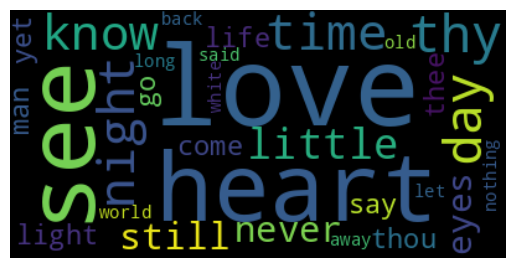

In [ ]:
# get tuples
tuples = [tuple(x) for x in freqSubset.values]

# generate wordcloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(dict(tuples))

# show figure
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Interactive Scatterplot

In [ ]:
# generate scatterplot
fig = px.scatter(freqSubset, x='Term', y='Frequency', color = 'Term')
fig.show()